
Data can be downloaded from [Visual Object Classes Challenge 2012 (VOC2012)](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html#data)

This data was [previously](https://fairyonice.github.io/Object_detection_with_PASCAL_VOC2012_data_preparation_and_understanding.html) analyzed to demonstrate RCNN, one of the common object detection techiniques.
Please see [this blog](https://fairyonice.github.io/Object_detection_with_PASCAL_VOC2012_data_preparation_and_understanding.html)
for its descriptive analysis and how I obtain the ground truth object detection dataframes.

In [1]:
import os 
import scipy
import numpy as np
import xml
import matplotlib.pyplot as plt
import pandas as pd 

img_dir         = "ObjectDetectionRCNN/VOCdevkit/VOC2012/JPEGImages"

The annotations are stored in the xml files in the downloaded folder. 
There are 17125 xml files, and one xml file contains the objects recorded in a single image.
I created a single csv file that combines the ground truth infomation of all the xml files.
The script to create df_anno.csv is discussed at [Part 1 Object Detection with Pascal VOC2012 - Data Preparation and Understanding](https://fairyonice.github.io/Object_detection_with_PASCAL_VOC2012_data_preparation_and_understanding.html).
I will read in this dataframe df_anno.csv.

Please refer to the previous blog post to learn what df_anno contains.
I will also skip the descriptive analysis.

In [2]:
import pandas as pd
# the location where df_anno.csv is saved 
dir_preprocessed = "ObjectDetectionRCNN/VOCdevkit/VOC2012"
df_anno = pd.read_csv(os.path.join(dir_preprocessed,"df_anno.csv"),
                     low_memory=False)
df_anno.head()

,width,height,depth,bbx_0_name,bbx_0_xmin,bbx_0_ymin,bbx_0_xmax,bbx_0_ymax,Nobj,fileID,...,bbx_54_name,bbx_54_xmin,bbx_54_ymin,bbx_54_xmax,bbx_54_ymax,bbx_55_name,bbx_55_xmin,bbx_55_ymin,bbx_55_xmax,bbx_55_ymax
0,486,500,3,person,174.0,101.0,349.0,351.0,1,2007_000027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500,281,3,aeroplane,104.0,78.0,375.0,183.0,4,2007_000032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500,366,3,aeroplane,9.0,107.0,499.0,263.0,3,2007_000033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,500,375,3,tvmonitor,156.0,89.0,344.0,279.0,1,2007_000039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,500,335,3,train,263.0,32.0,500.0,295.0,2,2007_000042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For each image, there are at most 55 objects. 
There are 20 objects.
Let's take a look at these objects.

In [3]:
maxNobj = 55
bbxs = []
for ibbx in range(maxNobj):
    bbxs.extend(df_anno["bbx_{}_name".format(ibbx)].values)
    
class_nm = np.unique(bbxs)
class_nm = class_nm[class_nm != 'nan']

### Create a mapping dictionary from class name to an one-hot-encoded vector 
I will one-hot encode each class.
- aeroplane --> [1,0,0,...,0]
- bicycle -----> [0,1,0,...,0]
- tvmonitor --> [0,0,0,...,1]

In [4]:
map_from_classnm_to_int = {}
for i, myclass in enumerate(class_nm):
    vec = np.zeros(len(class_nm))
    vec[i] = 1
    map_from_classnm_to_int[myclass] = list(vec)
map_from_classnm_to_int

{'aeroplane': [1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'bicycle': [0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'bird': [0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'boat': [0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'bottle': [0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'bus': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'car': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

## Read in the images
As you see from [Part 1 Object Detection with Pascal VOC2012 - Data Preparation and Understanding](https://fairyonice.github.io/Object_detection_with_PASCAL_VOC2012_data_preparation_and_understanding.html),
each image frame has a different shape. 
To simplify the problem, I set all the input images of Yolo to be the same size. 

The following codes do: 
- Resize images so that all the images will have the same shape. 
- To account for the change in the image size, change the annotaitons. 


In [5]:
def resize_annotation(row,maxNobj,new_height,new_width):
    '''
    Adapt the image size change to the annotation x,y coordinates.
    '''
    colnms = []
    row_new  = []
    for ibbx in range(maxNobj):
        for nm in ["xmin","xmax","ymin","ymax","name"]:
            colnm = "bbx_{}_{}".format(ibbx,nm)
            v = row[colnm]
            if (nm == "xmin") or (nm == "xmax"):
                row_new.append(v*float(new_width)/row["width"])
            elif (nm == "ymin") or (nm == "ymax"):
                row_new.append(v*float(new_height)/row["height"])
            else:
                row_new.append(v)
            colnm_resize = "bbx_resize_{}_{}".format(ibbx,nm)
            colnms.append(colnm_resize)
    return(row_new,colnms)


import skimage.transform
new_height,new_width = 112, 112 ## 2*2*2*2*7
## N_train is less than the df_anno.shape[0] then only the subset of the frame is extracted.
N_train = 1000
_X = []
_y = []
for irow in range(df_anno.shape[0]):
    if irow % 1000 == 0:
        print("..{}/{} is done".format(irow,df_anno.shape[0]))
    row  = df_anno.iloc[irow,:]
    # read in image
    path = os.path.join(img_dir, row["fileID"] + ".jpg")
    img  = scipy.misc.imread(path)
    # Resize images so that all the images will have the same shape. 
    img  = skimage.transform.resize(img,(new_height,new_width))
    _X.append(img)
    # Adapt the change in the image size into the annotation.
    row_anno, colnm_resize = resize_annotation(row,maxNobj,new_height,new_width)
    _y.append(row_anno)
    if irow > N_train:
        break
_X = np.array(_X,dtype=np.float32)
df_anno_resize = pd.DataFrame(_y,columns=colnm_resize)
df_anno_resize["Nobj"] = df_anno["Nobj"] 

..0/17125 is done


/Users/yumikondo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/Users/yumikondo/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


..1000/17125 is done


Visualization to check if the resized annotations are correct.
See that the image shape is the same. 

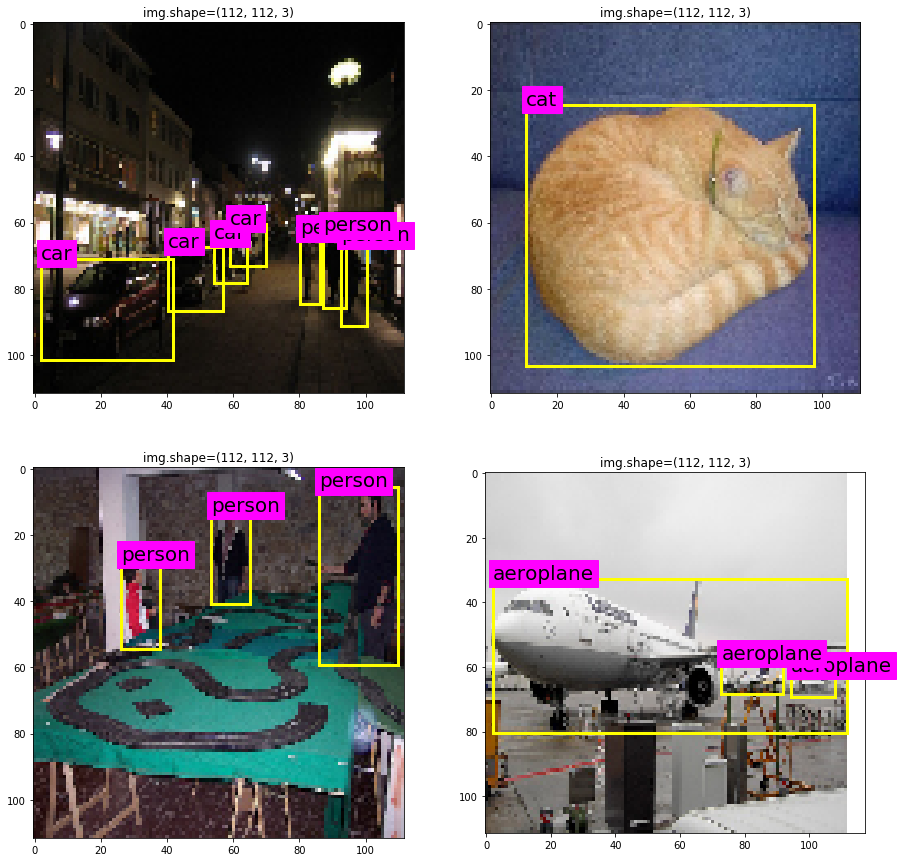

In [6]:
def plt_rectangle(plt,label,x1,y1,x2,y2):
    linewidth = 3
    color = "yellow"
    plt.text(x1,y1,label,fontsize=20,backgroundcolor="magenta")
    plt.plot([x1,x1],[y1,y2], linewidth=linewidth,color=color)
    plt.plot([x2,x2],[y1,y2], linewidth=linewidth,color=color)
    plt.plot([x1,x2],[y1,y1], linewidth=linewidth,color=color)
    plt.plot([x1,x2],[y2,y2], linewidth=linewidth,color=color)
    
Nplot = 4
count = 1
fig = plt.figure(figsize=(15,15))
for irow in np.random.randint(0,_X.shape[0],Nplot):
    img = _X[irow]
    row = df_anno_resize.iloc[irow,:]     
    ax  = fig.add_subplot(2,2,count)
    count += 1
    ax.set_title("img.shape={}".format(img.shape))
    ax.imshow(img)

    for iplot in range(row["Nobj"]):
        plt_rectangle(ax,
                      label = row["bbx_resize_{}_name".format(iplot)],
                      x1    = row["bbx_resize_{}_xmin".format(iplot)],
                      y1    = row["bbx_resize_{}_ymin".format(iplot)],
                      x2    = row["bbx_resize_{}_xmax".format(iplot)],
                      y2    = row["bbx_resize_{}_ymax".format(iplot)])
plt.show()

### One more adaptation to the annotation representation 
Represent each bounding box not by (xmin, xmax,ymin,ymax) but by (xcenter,ycenter,width,height).
This is once again to adap the Yolo representation of the training image.

In [7]:
df_anno_resize_center = []
for irow in range(df_anno_resize.shape[0]):
    row = df_anno_resize.iloc[irow,:]      
    row_new = {}
    for ibbx in range(row["Nobj"]):
        xmin    = row["bbx_resize_{}_xmin".format(ibbx)]
        xmax    = row["bbx_resize_{}_xmax".format(ibbx)]
        ymin    = row["bbx_resize_{}_ymin".format(ibbx)]
        ymax    = row["bbx_resize_{}_ymax".format(ibbx)]
        row_new["bbx_resize_{}_xcenter".format(ibbx)] = float(xmin + xmax)/2
        row_new["bbx_resize_{}_ycenter".format(ibbx)] = float(ymin + ymax)/2
        row_new["bbx_resize_{}_width".format(ibbx)]   = xmax - xmin
        row_new["bbx_resize_{}_height".format(ibbx)]  = ymax - ymin
        row_new["bbx_resize_{}_name".format(ibbx)]    = row["bbx_resize_{}_name".format(ibbx)]
    df_anno_resize_center.append(row_new)
df_anno_resize_center = pd.DataFrame(df_anno_resize_center)
df_anno_resize_center["Nobj"] = df_anno_resize["Nobj"]

Visualization to check if the new annotation formats are correct.
See that the image shape is the same. 

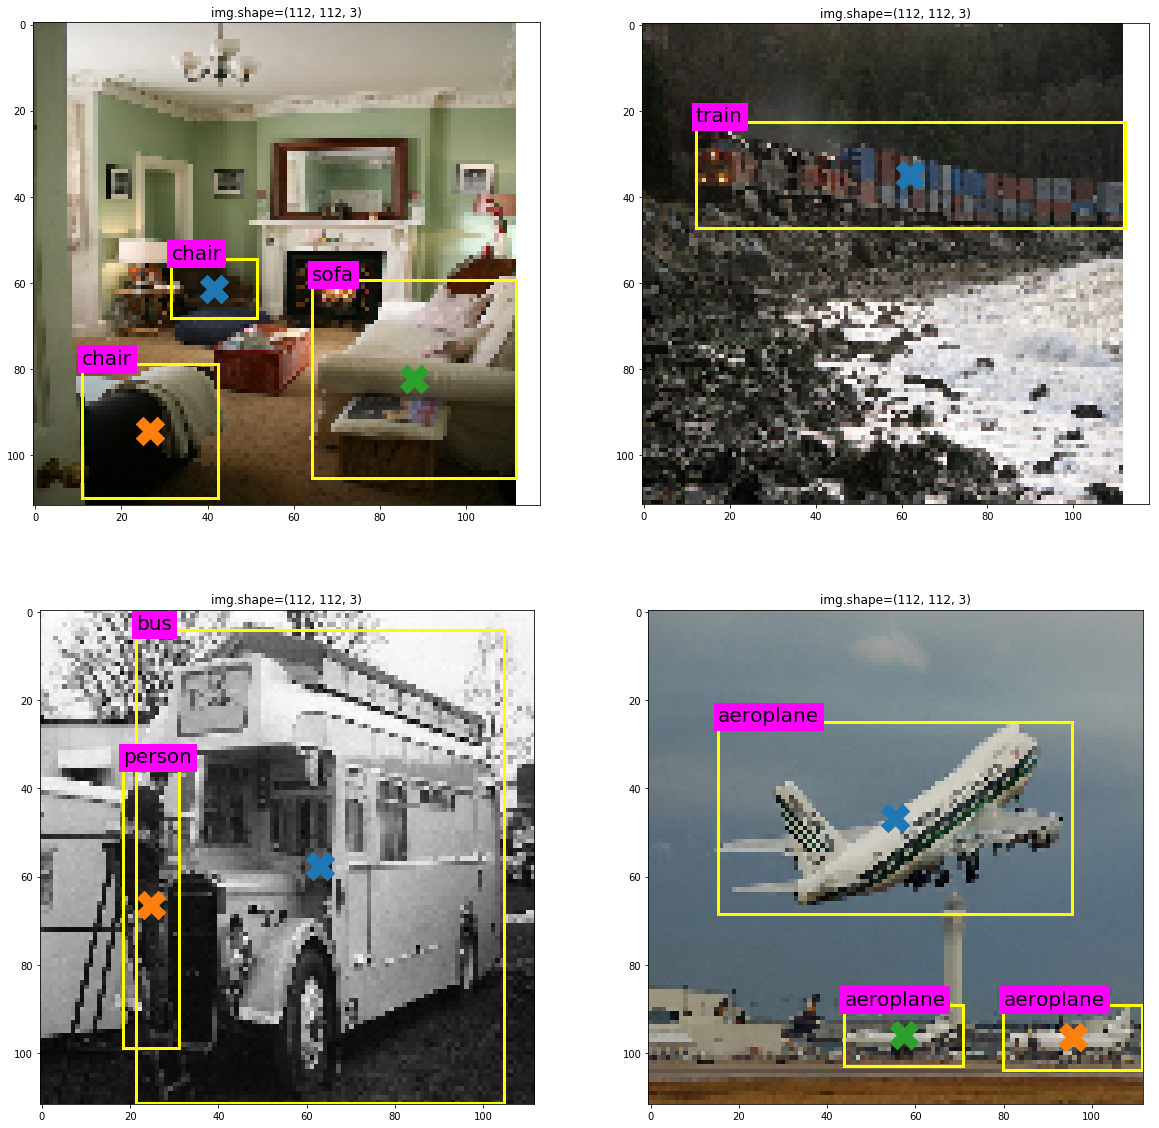

In [8]:
import scipy.misc
def plt_rectangle_center(plt,label,xcenter,ycenter,width,height):
    plt.scatter(xcenter,ycenter,marker="X",s=800)
    x1 = xcenter - width/2
    y1 = ycenter - height/2
    x2 = xcenter + width/2
    y2 = ycenter + height/2
    plt_rectangle(plt,label,x1,y1,x2,y2)

size  = 4
count = 1
fig   = plt.figure(figsize=(20,20))
for irow in np.random.randint(0,_X.shape[0],size):
    img = _X[irow]
    row = df_anno_resize_center.iloc[irow,:]    
    ax  = fig.add_subplot(2,2,count)
    ax.set_title("img.shape={}".format(img.shape))
    ax.imshow(img)

    for iobj in range(row["Nobj"]):
        plt_rectangle_center(ax,
                      label   = row["bbx_resize_{}_name".format(iobj)],
                      xcenter = row["bbx_resize_{}_xcenter".format(iobj)],
                      ycenter = row["bbx_resize_{}_ycenter".format(iobj)],
                      width   = row["bbx_resize_{}_width".format(iobj)],
                      height  = row["bbx_resize_{}_height".format(iobj)])
    count += 1
plt.show()

## Define YOLO Grid cells

YOLO encodes its output in a seemingly non-intuitive way. 
The Predictions Vector
<blockquote>
The input image is divided into an GRID_H x GRID_W grid of cells. 
For each object that is present on the image, one grid cell is said to be “responsible” for predicting it. That is the cell where the center of the object falls into.
</blockquote>
For example, in the image below, (iGrid_W=2,iGrid_H=2) grid cell is responsible for predicting the car object as the center of the car falls into this grid cell.
<blockquote>
Each grid cell predicts B bounding boxes as well as C class probabilities. The bounding box prediction has 5 components: (x, y, w, h, confidence). The (x, y) coordinates represent the center of the box, relative to the grid cell location (remember that, if the center of the box does not fall inside the grid cell, than this cell is not responsible for it). These coordinates are normalized to fall between 0 and 1. The (w, h) box dimensions are also normalized to [0, 1], relative to the image size. Let’s look at an example:
</blockquote>


<a data-flickr-embed="true"  href="https://www.flickr.com/photos/157237655@N08/32474281828/in/datetaken-public/" title="IMG_9489"><img src="https://farm5.staticflickr.com/4805/32474281828_e4e409804b_h.jpg" width="1600" height="1200" alt="IMG_9489"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

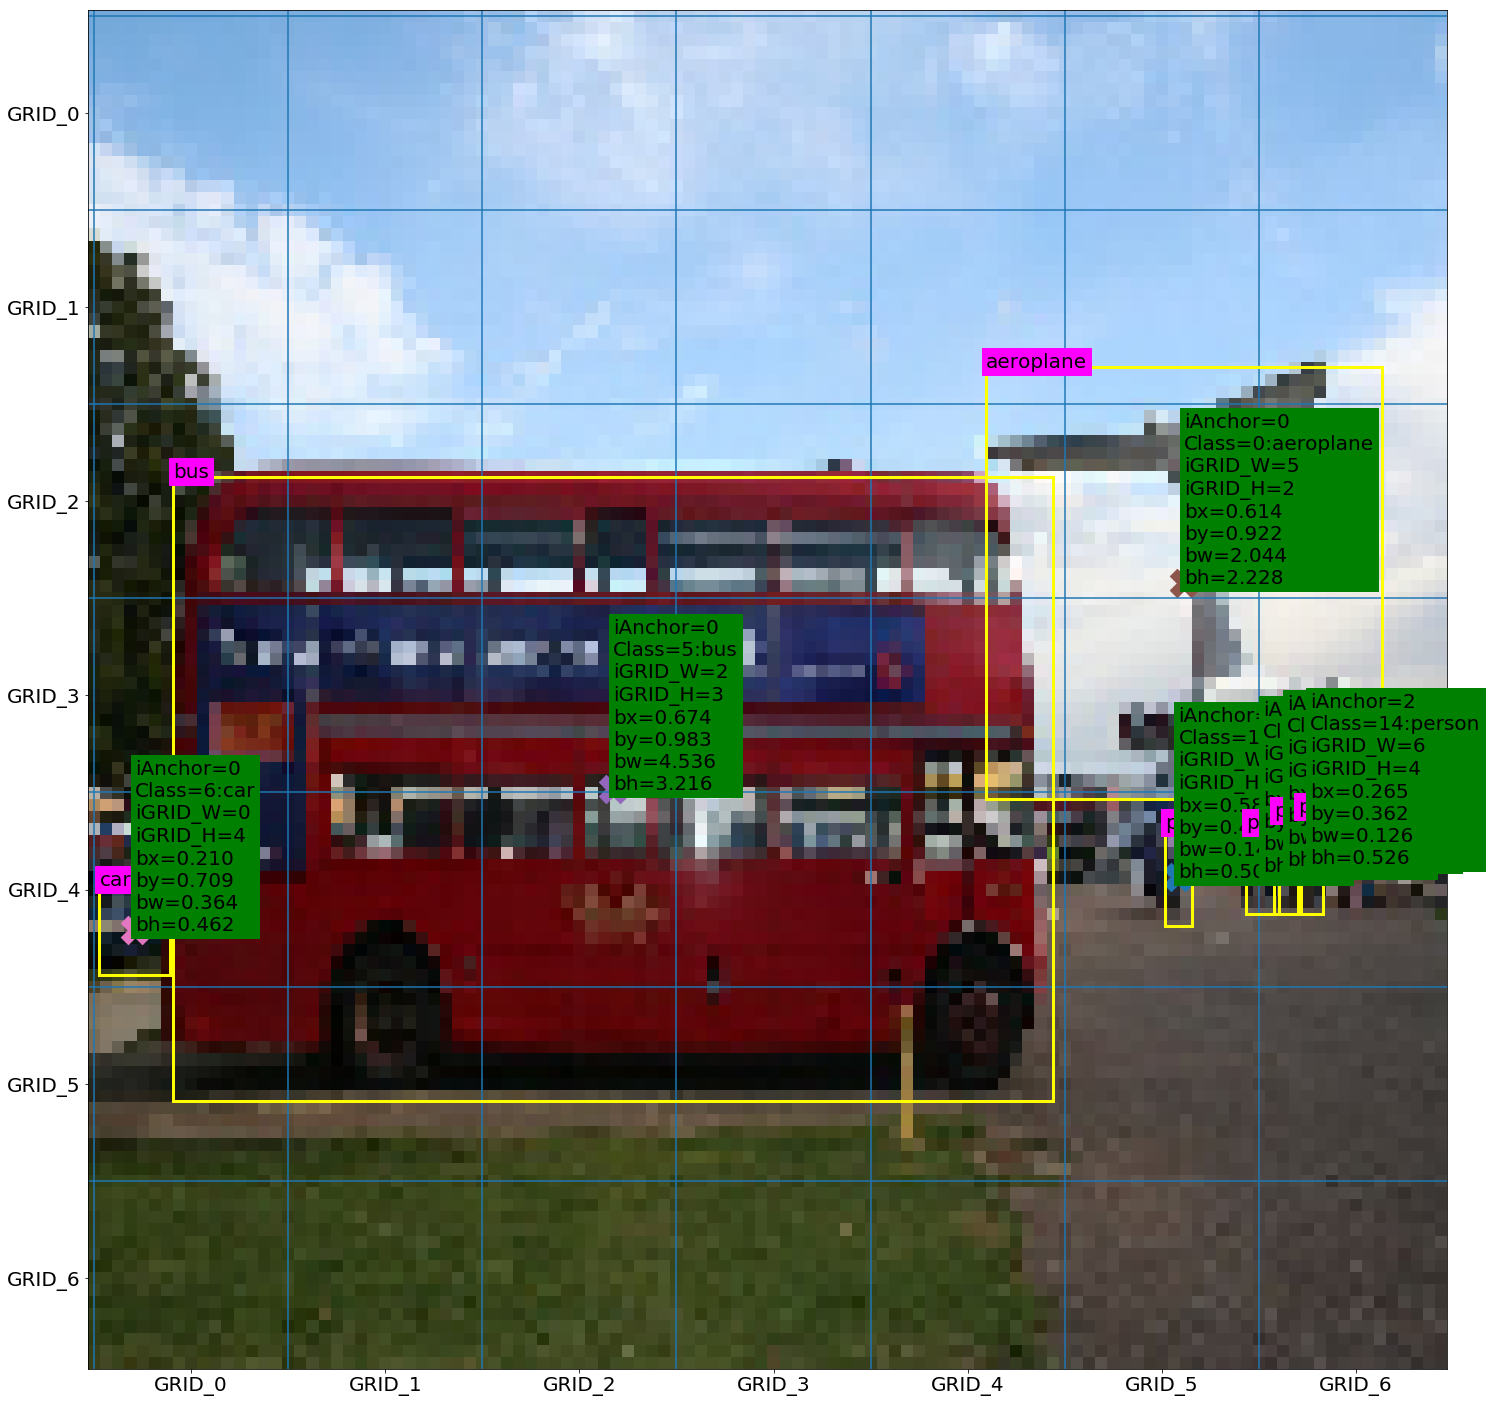

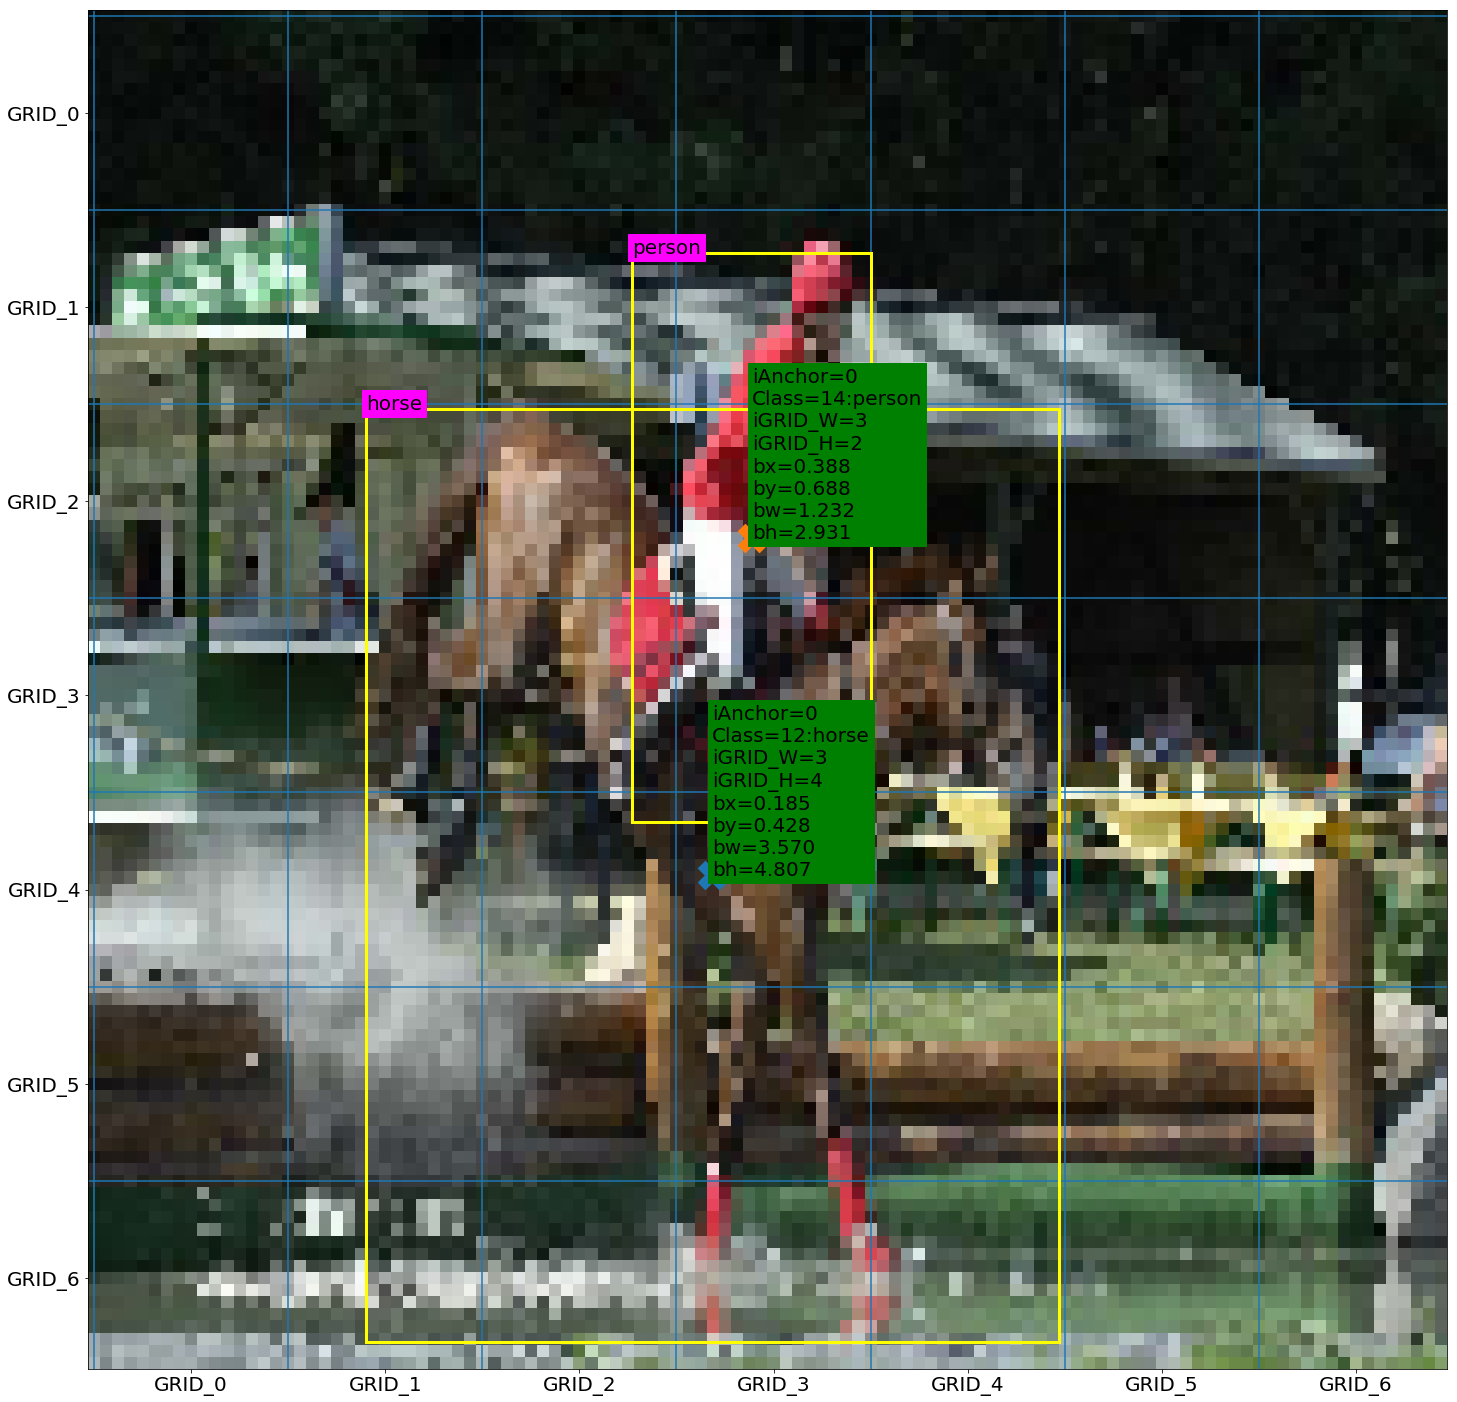

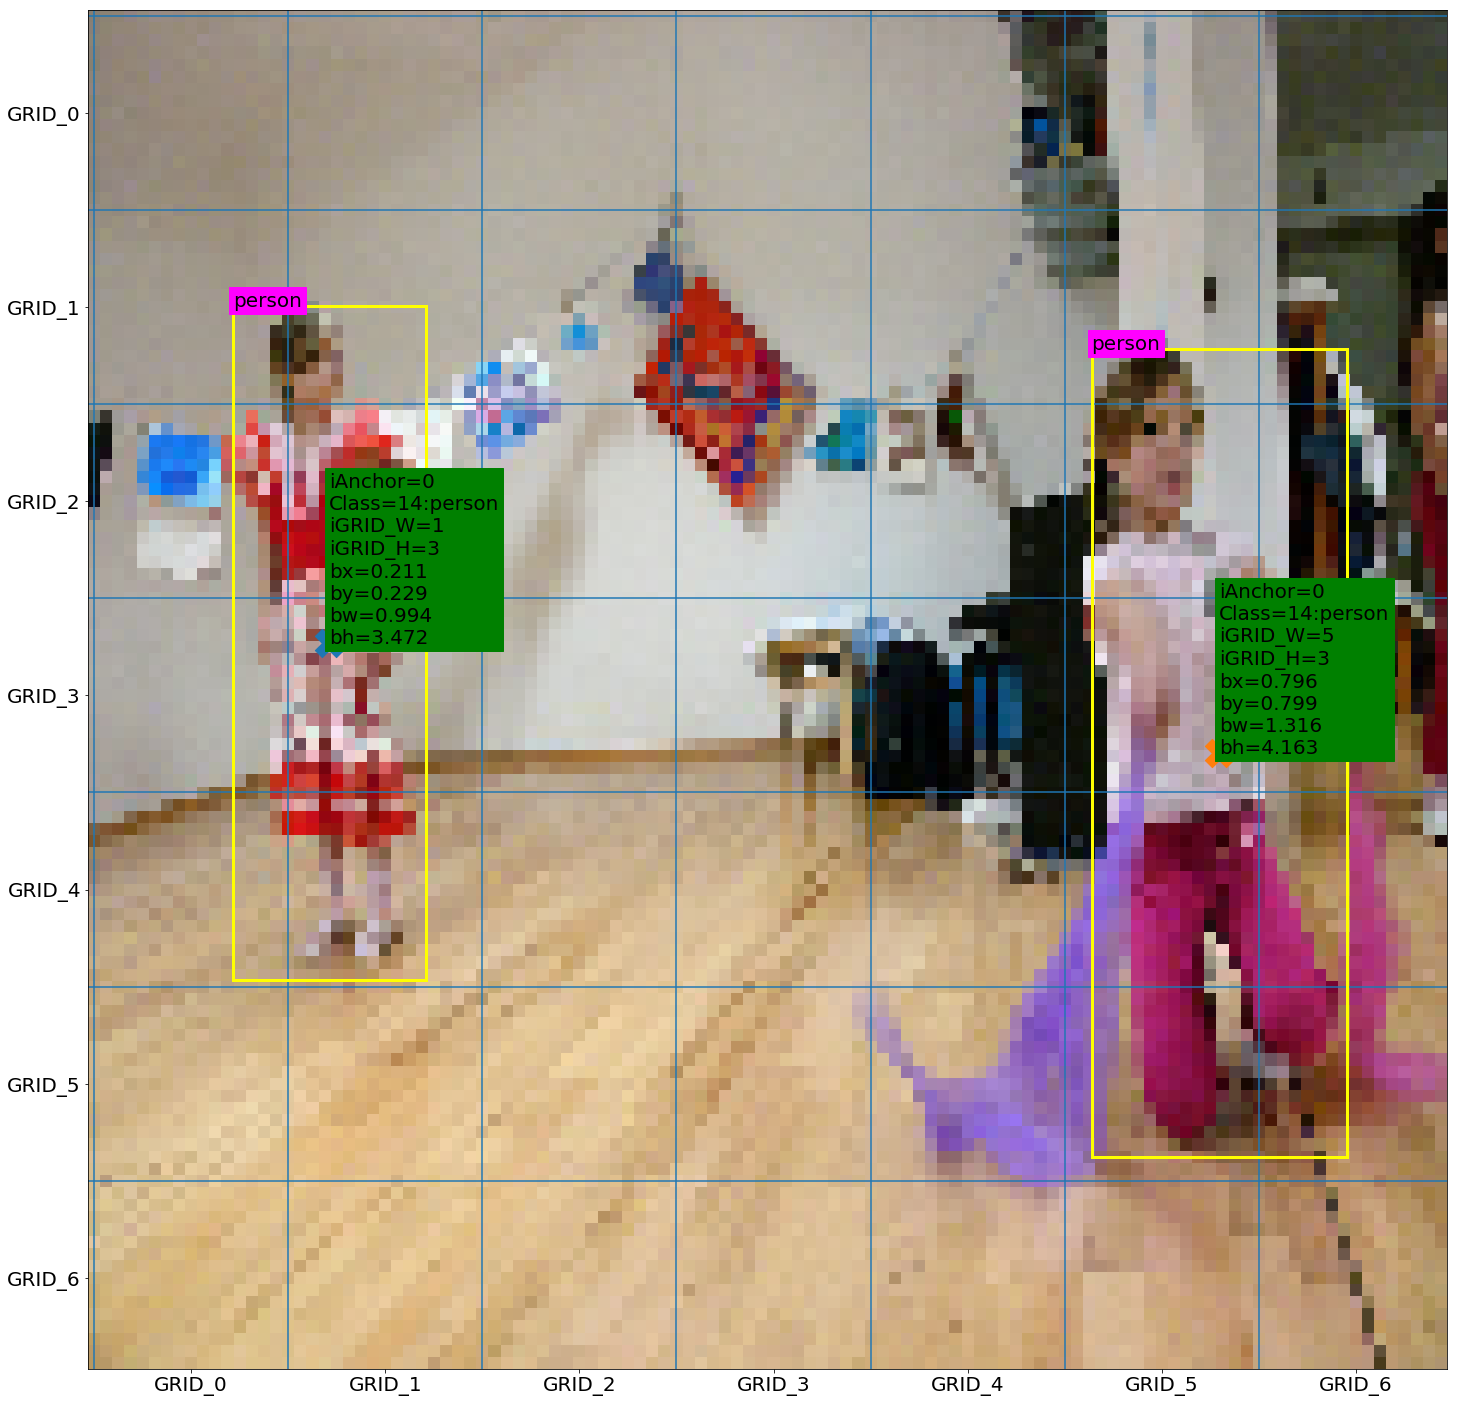

In [9]:
def get_target_per_anchor_box(xcenter,ycenter,width,height,GRID_W_length,GRID_H_length):
    '''
    Each boundary box contains 5 elements: (bx, by, bw, bh) and a box confidence score. 
    confidence score = 1 for all the y_train
    '''
    iGRID_W = int(np.floor(xcenter/GRID_W_length))
    iGRID_H = int(np.floor(ycenter/GRID_H_length))
    b_x     = (xcenter - iGRID_W * GRID_W_length)/float(GRID_W_length)
    b_y     = (ycenter - iGRID_H * GRID_H_length)/float(GRID_H_length)    
    b_w     = width/float(GRID_W_length)
    b_h     = height/float(GRID_H_length)

    return([iGRID_W,iGRID_H],[b_x,b_y,b_w,b_h])

ANCHOR_BOX = 3
CLASS      = 20
# To evaluate PASCAL VOC, YOLO uses 7×7 grids (S×S), 2 boundary boxes (B) and 20 classes (C).
## The number of grids in Yolo outputs 
GRID_H = 7
GRID_W = 7

x          = _X[irow]
assert int(x.shape[0]/GRID_H) == x.shape[0]/GRID_H
assert int(x.shape[1]/GRID_W) == x.shape[1]/GRID_W
GRID_H_length = int(x.shape[0]/GRID_H)
GRID_W_length = int(x.shape[1]/GRID_W)


## try with different irow!
for irow    in [42, 25, 26]:
    row        = df_anno_resize_center.iloc[irow,:]
    x          = _X[irow]

    ## ================ ## 
    ## Background plot 
    ## ================ ## 
    plt.figure(figsize=(25,25))
    plt.imshow(x)
    for i in range(GRID_H):
        plt.axhline(GRID_H_length*i)
        plt.axvline(GRID_W_length*i)
    plt.xticks(GRID_W_length*np.arange(GRID_W)+GRID_W_length/2,
              ["GRID_{}".format(igrid) for igrid in range(GRID_W)],
              fontsize=20)
    plt.yticks(GRID_H_length*np.arange(GRID_H)+GRID_H_length/2,
              ["GRID_{}".format(igrid) for igrid in range(GRID_H)],
              fontsize=20)

    target_i = np.zeros((GRID_H,GRID_W,ANCHOR_BOX, 1 + 4 + CLASS))
    for iobj in range(row["Nobj"]):
        bbID = "bbx_resize_{}_".format(iobj)
        xcenter = row["{}xcenter".format(bbID)]
        ycenter = row["{}ycenter".format(bbID)]
        width   = row["{}width".format(bbID)]
        height  = row["{}height".format(bbID)]
        (iGRID_W,iGRID_H), target = get_target_per_anchor_box(
                                        xcenter,ycenter,width,height,
                                        GRID_W_length,GRID_H_length)
        for iAnchor in range(target_i.shape[2]):
            if target_i[iGRID_H,iGRID_W,iAnchor,0]==0:
                break

        classID = map_from_classnm_to_int[row["{}name".format(bbID)]]
        target_i[iGRID_H,iGRID_W,iAnchor,:] = [1] + target + classID

        plt_rectangle_center(plt,
                          label   = row["{}name".format(bbID)],
                          xcenter = xcenter,
                          ycenter = ycenter,
                          width   = width,
                          height  = height)

        plt.text(xcenter,ycenter,
                 "iAnchor={}\nClass={}:{}\niGRID_W={}\niGRID_H={}\nbx={:4.3f}\nby={:4.3f}\nbw={:4.3f}\nbh={:4.3f}".format(
                     iAnchor,np.where(classID)[0][0],row["{}name".format(bbID)],
                     iGRID_W,iGRID_H,target[0],target[1],target[2],target[3]),
                 fontsize=20,
                 backgroundcolor="green")

    plt.show()

In [10]:
def create_target_matrix(row,GRID_H, GRID_W, GRID_H_length,GRID_W_length,ANCHOR_BOX,map_from_classnm_to_int):
    '''
    == output ==
    
    target_i : (GRID_H, GRID_W, ANCHOR_BOX, 1 + 4 + class)
    
    The final dimension contain [ b_x, b_y, b_w, b_h, bounding box prob, prC1, .. prC20]
    '''

    CLASS = len(map_from_classnm_to_int)
    target_i = np.zeros((GRID_H,GRID_W,ANCHOR_BOX, 1 + 4 + CLASS))
    for iobj in range(row["Nobj"]):
        bbID = "bbx_resize_{}_".format(iobj)
        xcenter = row["{}xcenter".format(bbID)]
        ycenter = row["{}ycenter".format(bbID)]
        width   = row["{}width".format(bbID)]
        height  = row["{}height".format(bbID)]
        (iGRID_W,iGRID_H), target = get_target_per_anchor_box(
                                        xcenter,ycenter,width,height,
                                        GRID_W_length,GRID_H_length)
        success = 0
        for iAnchor in range(target_i.shape[2]):
            if target_i[iGRID_H,iGRID_W,iAnchor,0]==0:
                success = 1
                break
        classID = map_from_classnm_to_int[row["{}name".format(bbID)]]
        target_i[iGRID_H,iGRID_W,iAnchor,:] = target + [1] + classID
    return(target_i,success)

y = []
for irow in range(df_anno_resize_center.shape[0]):
    row         = df_anno_resize_center.iloc[irow,:]
    yi, success = create_target_matrix(row,
                         GRID_H, 
                         GRID_W, 
                         GRID_H_length,
                         GRID_W_length,
                         ANCHOR_BOX,
                         map_from_classnm_to_int)
    if success==0:
        print("----->{} Error, Not enough Anchor boxes!".format(irow))
    y.append(yi)
y = np.array(y)
print("(Ntrain, GRID_H, GRID_W, ANCHOR_BOX, 1 + 4 + class)={}".format(y.shape))

----->117 Error, Not enough Anchor boxes!
----->387 Error, Not enough Anchor boxes!
(Ntrain, GRID_H, GRID_W, ANCHOR_BOX, 1 + 4 + class)=(1002, 7, 7, 3, 25)


## Define model

In [11]:
from keras.models import *
from keras.layers import *
import tensorflow as tf
input_image = Input(shape=(new_height,new_width, 3))



# Layer 1
x = Conv2D(32, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input_image)
x = BatchNormalization(name='norm_1')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 2
x = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_2', use_bias=False)(x)
x = BatchNormalization(name='norm_2')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 3
x = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_3', use_bias=False)(x)
x = BatchNormalization(name='norm_3')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 4
x = Conv2D(64, (1,1), strides=(1,1), padding='same', name='conv_4', use_bias=False)(x)
x = BatchNormalization(name='norm_4')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 5
x = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_5', use_bias=False)(x)
x = BatchNormalization(name='norm_5')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 6
x = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_6', use_bias=False)(x)
x = BatchNormalization(name='norm_6')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 7
x = Conv2D(128, (1,1), strides=(1,1), padding='same', name='conv_7', use_bias=False)(x)
x = BatchNormalization(name='norm_7')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 8
x = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_8', use_bias=False)(x)
x = BatchNormalization(name='norm_8')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 9
x = Conv2D(ANCHOR_BOX * (4 + 1 + CLASS), (1,1), strides=(1,1), padding='same', name='conv_23')(x)
output = Reshape((GRID_H, GRID_W, ANCHOR_BOX, 4 + 1 + CLASS))(x)


model = Model([input_image], output)
model.summary()

/Users/yumikondo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 112, 112, 3)       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 112, 112, 32)      864       
_________________________________________________________________
norm_1 (BatchNormalization)  (None, 112, 112, 32)      128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 112, 112, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 56, 56, 64)        18432     
_________________________________________________________________
norm_2 (BatchNormalization)  (None, 56, 56, 64)        256       
__________

# Calculating loss function of Yolo v2
There has been a lot of discussion on understanding Yolo loss funciton on line.
However, most of these discuss the loss function of Yolo v1 which is different from Yolo v2.
As this concern of the difference in the two loss fucntions are discussed at [What is YOLOv2 Loss Function - Google Groups](https://groups.google.com/forum/#!topic/darknet/TJ4dN9R4iJk)


The output of the loss functions 
- [ $x$, $y$, $w$, $h$, $C$, $P_{C_1}$,$P_{C_2}$, .. $P_{C_{20}}$]

The loss function of Yolo treats each of these output entries separately. 
So it looks complicated at the first grance. 
So let's understand each term of the loss one by one.

I learned a lot about the loss function from this post: [Understanding YOLO](https://hackernoon.com/understanding-yolo-f5a74bbc7967).

## Bounding box center, $x$, $y$
$$
\lambda_{\textrm{coord}}
\sum_{i=1}^{GRID_H\textrm{x}GRID_W}
\sum_{j=0}^{ANCHOR\textrm{_}BOX}\boldsymbol{1}^{\textrm{obj}}_{i,j}\Big[ 
(x_i - \widehat{x}_i)^2 +(y_i - \widehat{y}_i)^2
\Big]
$$

\begin{array}{rl}
\boldsymbol{1}^{\textrm{obj}}_{i,j} = 
\begin{cases}
& 1 \textrm{    if an object is present in grid cell } i \textrm{ and the } j \textrm{th bounding box predictor is “responsible” for that prediction}\\
& 0 \textrm{    otherwise}
\end{cases}
\end{array}




YOLO predicts multiple bounding boxes per grid cell. At training time we only want one bounding box predictor to be responsible for each object. We assign one predictor to be “responsible” for predicting an object based on which prediction has the highest current IOU with the ground truth.

$(x_i, y_i)$ are the center of the actual bounding box position for the grid cell $i$, 
and $(\widehat{x}_i, \widehat{y}_i)$ are the center of the predicted bounding box position in the grid cell $i$.

## Bounding box width / height, $w$, $h$

$$
\lambda_{\textrm{coord}}
\sum_{i=1}^{GRID_H\textrm{x}GRID_W}
\sum_{j=0}^{ANCHOR\textrm{_}BOX}\boldsymbol{1}^{\textrm{obj}}_{i,j}\Big[ 
(\sqrt{w}_i - \sqrt{\widehat{w}}_i)^2 +(\sqrt{h}_i - \sqrt{\widehat{h}}_i)^2
\Big]
$$

<blockquote>
This is the loss related to the predicted box width / height. The equation looks similar to the first one, except for the square root. What’s up with that? Quoting the paper again:

Our error metric should reflect that small deviations in large boxes matter less than in small boxes. To partially address this we predict the square root of the bounding box width and height instead of the width and height directly.
</blockquote>

## Confidence, $C$

$$
\sum_{i=1}^{GRID_H\textrm{x}GRID_W}
\sum_{j=0}^{ANCHOR\textrm{_}BOX}\boldsymbol{1}^{\textrm{obj}}_{i,j}
(C_i - \widehat{C}_i)^2 +
\lambda_{\textrm{nobj}}
\sum_{i=1}^{GRID_H\textrm{x}GRID_W}
\sum_{j=0}^{ANCHOR\textrm{_}BOX}\boldsymbol{1}^{\textrm{nobj}}_{i,j}
(C_i - \widehat{C}_i)^2
$$

Here we compute the loss associated with the confidence score for each bounding box predictor. 
- $C_i$: is the confidence score 
- $\widehat{C}_i$: the intersection over union of the predicted bounding box with the ground truth.

\begin{array}{rl}
\boldsymbol{1}^{\textrm{obj}}_{i,j} = 
\begin{cases}
& 0 \textrm{ if an object is present in grid cell } i \textrm{ and the } j \textrm{th bounding box predictor is “responsible” for that prediction}\\
& 1\textrm{ otherwise}
\end{cases}
\end{array}


The $\lambda$ parameters that appear here and also in the first part are used to differently weight parts of the loss functions. This is necessary to increase model stability. The highest penalty is for coordinate predictions ($\lambda_{\textrm{coord}}$ = 5) and the lowest for confidence predictions when no object is present 
($\lambda_{\textrm{noobj}}$ = 0.5).



## Probabilities, $P_{C_1}$,$P_{C_2}$, .. $P_{C_{20}}$

$$
\sum_{i=1}^{GRID_H\textrm{x}GRID_W}
\sum_{c=0}^{Class}\boldsymbol{1}^{\textrm{obj}}_{i}
(p_i(c) - \widehat{p}_i(c) )^2
$$

It looks similar to a normal sum-squared error for classification, except for the $\boldsymbol{1}^{\textrm{obj}}_{i}$ term. 
This term is used because so we don’t penalize classification error when no object is present on the cell (hence the conditional class probability discussed earlier).

- The loss implementation in Keras is available at [keras-yolo2/Yolo Step-by-Step.ipynb](https://github.com/experiencor/keras-yolo2/blob/master/Yolo%20Step-by-Step.ipynb).


In [15]:

ANCHOR_BOX = 3
print(BATCH_SIZE,ANCHOR_BOX)

NO_OBJECT_SCALE  = 1.0
OBJECT_SCALE     = 5.0
COORD_SCALE      = 1.0
CLASS_SCALE      = 1.0
COORD_SCALE = 1
BOX   = 3
BATCH_SIZE       = 16
WARM_UP_BATCHES  = 0
TRUE_BOX_BUFFER  = 50
CLASS_WEIGHTS    = np.ones(CLASS, dtype='float32')

_y_pred = y[:BATCH_SIZE]
_y_true = y[BATCH_SIZE:2*BATCH_SIZE]
_y_pred.shape
BATCH_SIZE = _y_pred.shape[0]

16 3


In [16]:
dummy_array = np.zeros((1,1,1,1,TRUE_BOX_BUFFER,4))
true_boxes = tf.constant(dummy_array,dtype="float32")

In [17]:
sess = tf.InteractiveSession()

y_pred = tf.constant(_y_pred,dtype="float32")
y_true = tf.constant(_y_true,dtype="float32")
seen = tf.Variable(0.)
total_recall = tf.Variable(0.)
## Make some Anchor "good" at representing certain shape of bounding box    
ANCHORS   = [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434]#, 7.88282, 3.52778, 9.77052, 9.16828]
ANCHORS   = np.reshape(ANCHORS, [1,1,1,BOX,2])
def adjust_scale_prediction(y_pred):    
    """
        Adjust prediction
        
        y_pred.shape = (Nsample, NGridy, NGridx, NAnchor, 4 + 1 + N class)
    """

    cell_grid = get_cell_grid()
    ## cell_grid is of the shape of 
    
    ### adjust x and y  
    # the bounding box bx and by are rescaled to range between 0 and 1 for given gird.
    # Since there are BOX x BOX grids, we rescale each bx and by to range between 0 to BOX + 1
    pred_box_xy = tf.sigmoid(y_pred[..., :2]) + cell_grid # bx, by
    
    ### adjust w and h
    # rescale each grid to make some anchor "good" at representing certain shape of bounding box 
    pred_box_wh = tf.exp(y_pred[..., 2:4]) * ANCHORS # bw, bh

    ### adjust confidence
    pred_box_conf = tf.sigmoid(y_pred[..., 4])# prob bb

    ### adjust class probabilities
    pred_box_class = y_pred[..., 5:] # prC1, prC2, ..., prC20
    
    return(pred_box_xy,pred_box_wh,pred_box_conf,pred_box_class)


def adjust_ground_truth(y_true):
    """
        Adjust ground truth
    """
    ### adjust x and y
    true_box_xy = y_true[..., 0:2] # relative position to the containing cell

    ### adjust w and h
    true_box_wh = y_true[..., 2:4] # number of cells accross, horizontally and vertically
    return(true_box_xy, true_box_wh)



def adjust_bbx(true_box_xy,true_box_wh):
    '''
        adjust bounding box
        
        x : true_box_xy = (x_center, y_center)
        
        true_mins = (x1,y1)
                 ________________
                 |               |
                 |       x       |
                 |_______________|
                             true_maxs = (x2,y2)
        
        
    '''
    true_wh_half = true_box_wh / 2.
    true_mins    = true_box_xy - true_wh_half
    true_maxes   = true_box_xy + true_wh_half
    return(true_wh_half, true_mins, true_maxes)

def get_cell_grid(): 
    '''
    (batch size, GRID_H, GRID_W, 3, 2)
    output
    for any i=0,1..,batch size - 1
    output[i,5,3,:,:] = array([[3., 5.],
                               [3., 5.],
                               [3., 5.]], dtype=float32)
    '''
    cell_x = tf.to_float(tf.reshape(tf.tile(tf.range(GRID_W), [GRID_H]), (1, GRID_H, GRID_W, 1, 1)))
    cell_y = tf.transpose(cell_x, (0,2,1,3,4))
    cell_grid = tf.tile(tf.concat([cell_x,cell_y], -1), [BATCH_SIZE, 1, 1, BOX, 1])
    return(cell_grid) 

def get_intersect_area(pred_mins,pred_maxes,  true_mins, true_maxes):
    '''
    p1 : pred_mins = (px1,py1)
    p2 : pred_maxs = (px2,py2)
    t1 : true_mins = (tx1,ty1) 
    t2 : true_maxs = (tx2,ty2) 
                 p1______________________ 
                 |      t1___________   |
                 |       |           |  |
                 |_______|___________|__|p2 
                         |           |rmax
                         |___________|
                                      t2
    intersect_mins : rmin = t1  = (tx1,ty1)
    intersect_maxs : rmax = (rmaxx,rmaxy)
    intersect_wh   : (rmaxx - tx1, rmaxy - ty1)
        
    '''
    intersect_mins  = tf.maximum(pred_mins,  true_mins)
    intersect_maxes = tf.minimum(pred_maxes, true_maxes)
    intersect_wh    = tf.maximum(intersect_maxes - intersect_mins, 0.)
    intersect_areas = intersect_wh[..., 0] * intersect_wh[..., 1]
    
    return(intersect_areas)


cell_grid = get_cell_grid()
    
pred_box_xy, pred_box_wh, pred_box_conf, pred_box_class = adjust_scale_prediction(y_pred)
true_box_xy, true_box_wh = adjust_ground_truth(y_true)

true_wh_half, true_mins, true_maxes = adjust_bbx(true_box_xy,true_box_wh)
pred_wh_half, pred_mins, pred_maxes = adjust_bbx(pred_box_xy,pred_box_wh)

intersect_areas = get_intersect_area(pred_mins,pred_maxes,  true_mins, true_maxes)

true_areas = true_box_wh[..., 0] * true_box_wh[..., 1]
pred_areas = pred_box_wh[..., 0] * pred_box_wh[..., 1]

union_areas = pred_areas + true_areas - intersect_areas
iou_scores  = tf.truediv(intersect_areas, union_areas)
    
    
true_box_conf = iou_scores * y_true[..., 4]
    
### adjust class probabilities
true_box_class = tf.argmax(y_true[..., 5:], -1)

pred_xy = tf.expand_dims(pred_box_xy, 4)


/Users/yumikondo/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [21]:
with tf.Session() as sess:
    cg = sess.run(cell_grid)
    print(cg)

[[[[[0. 0.]
    [0. 0.]
    [0. 0.]]

   [[1. 0.]
    [1. 0.]
    [1. 0.]]

   [[2. 0.]
    [2. 0.]
    [2. 0.]]

   ...

   [[4. 0.]
    [4. 0.]
    [4. 0.]]

   [[5. 0.]
    [5. 0.]
    [5. 0.]]

   [[6. 0.]
    [6. 0.]
    [6. 0.]]]


  [[[0. 1.]
    [0. 1.]
    [0. 1.]]

   [[1. 1.]
    [1. 1.]
    [1. 1.]]

   [[2. 1.]
    [2. 1.]
    [2. 1.]]

   ...

   [[4. 1.]
    [4. 1.]
    [4. 1.]]

   [[5. 1.]
    [5. 1.]
    [5. 1.]]

   [[6. 1.]
    [6. 1.]
    [6. 1.]]]


  [[[0. 2.]
    [0. 2.]
    [0. 2.]]

   [[1. 2.]
    [1. 2.]
    [1. 2.]]

   [[2. 2.]
    [2. 2.]
    [2. 2.]]

   ...

   [[4. 2.]
    [4. 2.]
    [4. 2.]]

   [[5. 2.]
    [5. 2.]
    [5. 2.]]

   [[6. 2.]
    [6. 2.]
    [6. 2.]]]


  ...


  [[[0. 4.]
    [0. 4.]
    [0. 4.]]

   [[1. 4.]
    [1. 4.]
    [1. 4.]]

   [[2. 4.]
    [2. 4.]
    [2. 4.]]

   ...

   [[4. 4.]
    [4. 4.]
    [4. 4.]]

   [[5. 4.]
    [5. 4.]
    [5. 4.]]

   [[6. 4.]
    [6. 4.]
    [6. 4.]]]


  [[[0. 5.]
    [0. 5.]
    [0. 5.]]

  

In [32]:
cg[0,5,3,:,:]

array([[3., 5.],
       [3., 5.],
       [3., 5.]], dtype=float32)

In [ ]:
with tf.Session() as sess:
    cg = sess.run(cell_grid)
    pxy = sess.run(pred_xy)
    
    print(pxy.shape)
    print(cg.shape)
isample = 1
ianchor = 2
for gridy in range(cg.shape[1]):
    for gridx in range(cg.shape[2]):
        print("gridy={}, gridx={}: {}".format(gridy,gridx,cg[isample,gridy,gridx,ianchor,:]))
    print("__")

In [18]:
mask_shape = tf.shape(y_true)[:4]
    
coord_mask = tf.zeros(mask_shape)
conf_mask  = tf.zeros(mask_shape)
class_mask = tf.zeros(mask_shape)
    
       
"""
    Determine the masks
"""
### coordinate mask: simply the position of the ground truth boxes (the predictors)
coord_mask = tf.expand_dims(y_true[..., 4], axis=-1) * COORD_SCALE
### confidence mask: penelize predictors + penalize boxes with low IOU
# penalize the confidence of the boxes, which have IOU with some ground truth box < 0.6
true_xy = true_boxes[..., 0:2]
true_wh = true_boxes[..., 2:4]
    
true_wh_half = true_wh / 2.
true_mins    = true_xy - true_wh_half
true_maxes   = true_xy + true_wh_half
    
pred_xy = tf.expand_dims(pred_box_xy, 4)
pred_wh = tf.expand_dims(pred_box_wh, 4)
    
pred_wh_half = pred_wh / 2.
pred_mins    = pred_xy - pred_wh_half
pred_maxes   = pred_xy + pred_wh_half    
    
intersect_mins  = tf.maximum(pred_mins,  true_mins)
intersect_maxes = tf.minimum(pred_maxes, true_maxes)
intersect_wh    = tf.maximum(intersect_maxes - intersect_mins, 0.)
intersect_areas = intersect_wh[..., 0] * intersect_wh[..., 1]
    
true_areas = true_wh[..., 0] * true_wh[..., 1]
pred_areas = pred_wh[..., 0] * pred_wh[..., 1]

union_areas = pred_areas + true_areas - intersect_areas
iou_scores  = tf.truediv(intersect_areas, union_areas)

best_ious = tf.reduce_max(iou_scores, axis=4)
conf_mask = conf_mask + tf.to_float(best_ious < 0.6) * (1 - y_true[..., 4]) * NO_OBJECT_SCALE
    
# penalize the confidence of the boxes, which are reponsible for corresponding ground truth box

In [19]:
    
"""
    Determine the masks
"""
### coordinate mask: simply the position of the ground truth boxes (the predictors)
coord_mask = tf.expand_dims(y_true[..., 4], axis=-1) * COORD_SCALE
    
### confidence mask: penelize predictors + penalize boxes with low IOU
# penalize the confidence of the boxes, which have IOU with some ground truth box < 0.6
true_xy = true_boxes[..., 0:2]
true_wh = true_boxes[..., 2:4]
    
true_wh_half = true_wh / 2.
true_mins    = true_xy - true_wh_half
true_maxes   = true_xy + true_wh_half
    
pred_xy = tf.expand_dims(pred_box_xy, 4)
pred_wh = tf.expand_dims(pred_box_wh, 4)
    
pred_wh_half = pred_wh / 2.
pred_mins    = pred_xy - pred_wh_half
pred_maxes   = pred_xy + pred_wh_half    
    
intersect_mins  = tf.maximum(pred_mins,  true_mins)
intersect_maxes = tf.minimum(pred_maxes, true_maxes)
intersect_wh    = tf.maximum(intersect_maxes - intersect_mins, 0.)
intersect_areas = intersect_wh[..., 0] * intersect_wh[..., 1]
    
true_areas = true_wh[..., 0] * true_wh[..., 1]
pred_areas = pred_wh[..., 0] * pred_wh[..., 1]

union_areas = pred_areas + true_areas - intersect_areas
iou_scores  = tf.truediv(intersect_areas, union_areas)

best_ious = tf.reduce_max(iou_scores, axis=4)
conf_mask = conf_mask + tf.to_float(best_ious < 0.6) * (1 - y_true[..., 4]) * NO_OBJECT_SCALE
    
# penalize the confidence of the boxes, which are reponsible for corresponding ground truth box
conf_mask = conf_mask + y_true[..., 4] * OBJECT_SCALE
    
### class mask: simply the position of the ground truth boxes (the predictors)
class_mask = y_true[..., 4] * tf.gather(CLASS_WEIGHTS, true_box_class) * CLASS_SCALE 


# penalize the confidence of the boxes, which are reponsible for corresponding ground truth box
conf_mask = conf_mask + y_true[..., 4] * OBJECT_SCALE
    
### class mask: simply the position of the ground truth boxes (the predictors)
class_mask = y_true[..., 4] * tf.gather(CLASS_WEIGHTS, true_box_class) * CLASS_SCALE       
    
"""
    Warm-up training
"""
no_boxes_mask = tf.to_float(coord_mask < COORD_SCALE/2.)
seen = tf.assign_add(seen, 1.)
    
true_box_xy, true_box_wh, coord_mask = tf.cond(tf.less(seen, WARM_UP_BATCHES), 
                          lambda: [true_box_xy + (0.5 + cell_grid) * no_boxes_mask, 
                                   true_box_wh + tf.ones_like(true_box_wh) * np.reshape(ANCHORS, [1,1,1,BOX,2]) * no_boxes_mask, 
                                   tf.ones_like(coord_mask)],
                          lambda: [true_box_xy, 
                                   true_box_wh,
                                   coord_mask])
    
"""
    Finalize the loss
"""
nb_coord_box = tf.reduce_sum(tf.to_float(coord_mask > 0.0))
nb_conf_box  = tf.reduce_sum(tf.to_float(conf_mask  > 0.0))
nb_class_box = tf.reduce_sum(tf.to_float(class_mask > 0.0))
    
loss_xy    = tf.reduce_sum(tf.square(true_box_xy-pred_box_xy)     * coord_mask) / (nb_coord_box + 1e-6) / 2.
loss_wh    = tf.reduce_sum(tf.square(true_box_wh-pred_box_wh)     * coord_mask) / (nb_coord_box + 1e-6) / 2.
loss_conf  = tf.reduce_sum(tf.square(true_box_conf-pred_box_conf) * conf_mask)  / (nb_conf_box  + 1e-6) / 2.
loss_class = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=true_box_class, logits=pred_box_class)
loss_class = tf.reduce_sum(loss_class * class_mask) / (nb_class_box + 1e-6)
loss = loss_xy + loss_wh + loss_conf + loss_class
    
nb_true_box = tf.reduce_sum(y_true[..., 4])
nb_pred_box = tf.reduce_sum(tf.to_float(true_box_conf > 0.5) * tf.to_float(pred_box_conf > 0.3))

"""
    Debugging code
"""    
current_recall = nb_pred_box/(nb_true_box + 1e-6)
total_recall = tf.assign_add(total_recall, current_recall) 

loss = tf.Print(loss, [tf.zeros((1))], message='Dummy Line \t', summarize=1000)
loss = tf.Print(loss, [loss_xy], message='Loss XY \t', summarize=1000)
loss = tf.Print(loss, [loss_wh], message='Loss WH \t', summarize=1000)
loss = tf.Print(loss, [loss_conf], message='Loss Conf \t', summarize=1000)
loss = tf.Print(loss, [loss_class], message='Loss Class \t', summarize=1000)
loss = tf.Print(loss, [loss], message='Total Loss \t', summarize=1000)
loss = tf.Print(loss, [current_recall], message='Current Recall \t', summarize=1000)
loss = tf.Print(loss, [total_recall/seen], message='Average Recall \t', summarize=1000)
    
    
    

(16, 7, 7, 3, 1, 2)
(16, 7, 7, 3, 2)
gridy=0, gridx=0: [0. 0.]
gridy=0, gridx=1: [1. 0.]
gridy=0, gridx=2: [2. 0.]
gridy=0, gridx=3: [3. 0.]
gridy=0, gridx=4: [4. 0.]
gridy=0, gridx=5: [5. 0.]
gridy=0, gridx=6: [6. 0.]
__
gridy=1, gridx=0: [0. 1.]
gridy=1, gridx=1: [1. 1.]
gridy=1, gridx=2: [2. 1.]
gridy=1, gridx=3: [3. 1.]
gridy=1, gridx=4: [4. 1.]
gridy=1, gridx=5: [5. 1.]
gridy=1, gridx=6: [6. 1.]
__
gridy=2, gridx=0: [0. 2.]
gridy=2, gridx=1: [1. 2.]
gridy=2, gridx=2: [2. 2.]
gridy=2, gridx=3: [3. 2.]
gridy=2, gridx=4: [4. 2.]
gridy=2, gridx=5: [5. 2.]
gridy=2, gridx=6: [6. 2.]
__
gridy=3, gridx=0: [0. 3.]
gridy=3, gridx=1: [1. 3.]
gridy=3, gridx=2: [2. 3.]
gridy=3, gridx=3: [3. 3.]
gridy=3, gridx=4: [4. 3.]
gridy=3, gridx=5: [5. 3.]
gridy=3, gridx=6: [6. 3.]
__
gridy=4, gridx=0: [0. 4.]
gridy=4, gridx=1: [1. 4.]
gridy=4, gridx=2: [2. 4.]
gridy=4, gridx=3: [3. 4.]
gridy=4, gridx=4: [4. 4.]
gridy=4, gridx=5: [5. 4.]
gridy=4, gridx=6: [6. 4.]
__
gridy=5, gridx=0: [0. 5.]
gridy=5, gri

## [YOLO Object Detection (TensorFlow tutorial)](https://www.youtube.com/watch?v=4eIBisqx9_g&t=1041s)